In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Generate Data

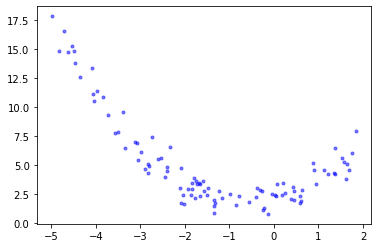

In [3]:
np.random.seed(7)
x = 7 * np.random.rand(100, 1) - 5
y = 0.8 * x**2 + 0.9*x + 2 + np.random.randn(100, 1)
raw_data = {
    "1": [item for sublist in x for item in sublist],
    "label": [item for sublist in y for item in sublist]
}
d_nl = pd.DataFrame(raw_data)

plt.plot(d_nl["1"], d_nl["label"], 'b.', alpha=0.5)

# Neural Network Algorithm

In [14]:
class NeuralNetwork:

    def __init__(self, hidden_neurons, training_data, layers=2, epochs=20000):
        self.layers = layers # for regression, assume num of layers is 2
        self.hidden_neurons = hidden_neurons
        self.epochs = epochs
        self.training_data = training_data

        self.label = self.training_data['label'].to_numpy()
        self.weights = self.init_weights()
    
    def init_weights(self):
        w_l1 = []
        w_l2 = [np.random.normal(0, 1)]

        for _ in range(self.hidden_neurons):
            w_l1.append([np.random.normal(0, 1), np.random.normal(0, 1)])
            w_l2.append(np.random.normal(0, 1/self.hidden_neurons)) #td: might need to adjust m
        
        return [w_l1, w_l2]
    
    def prepare_x(self, index, training_data):
        x = [1]
        for column_name in training_data.columns:
            if column_name != "label":
                x.append(training_data[column_name].to_numpy()[index])
        return x

    def sigmoid(self, Z):
        if isinstance(Z, np.float64) or type(Z) == int:
            return 1.0 / (1.0 + np.exp(-Z))
        else:
            return [1.0 / (1.0 + np.exp(-z)) for z in Z]
    
    def sigmoid_deriv(self, Z):
        if isinstance(Z, np.float64) or type(Z) == int:
            return self.sigmoid(Z)*(1-self.sigmoid(Z))
        else:
            return [self.sigmoid(z)*(1-self.sigmoid(z)) for z in Z]
    
    def error(self, predicted, target):
        return np.power(predicted-target, 2)

    def error_predicted_deriv(self, predicted, target):
        return 2*(predicted-target)

    def train_epoch(self, A0, index, learn_rate):
        A = [A0]
        z = [0] #note: add 0 to make the index align with A

        # feedforward
        # layer 1
        weights_l1 = self.weights[0]
        z_l1 = [1]
        a_l1 = [1]
        for neuron in range(self.hidden_neurons):
            z_neuron_1 = np.dot(weights_l1[neuron], A[0])
            a_neuron_1 = self.sigmoid(z_neuron_1)
            z_l1.append(z_neuron_1)
            a_l1.append(a_neuron_1)
        z.append(z_l1)
        A.append(a_l1)

        # layer 2
        z_l2 = np.dot(self.weights[1], A[1])
        a_l2 = z_l2
        z.append(z_l2)
        A.append(a_l2)
        # checkpoint1: feedforward done

        # backpropagation
        # layer 2
        error_deriv_l2 = self.error_predicted_deriv(A[2], self.label[index])
        act_deriv_l2 = 1
        gradient_l2 = np.multiply(np.multiply(A[1], act_deriv_l2), error_deriv_l2)
        self.weights[1] -= learn_rate * gradient_l2

        # layer 1
        for neuron in range(self.hidden_neurons):
            act_deriv_neuron_l1 = self.sigmoid_deriv(z[1][neuron])
            error_deriv_neuron_l1 = self.weights[1][neuron+1] #note: first item in weights is w0, so neuron+1
            gradient_neuron_l1 = np.multiply(np.multiply(A0, act_deriv_neuron_l1), error_deriv_neuron_l1)
            self.weights[0][neuron] -= learn_rate * gradient_neuron_l1
        # checkpoint2: backpropagation done
        
        # error calculation
        error = self.error(A[-1], self.label[index])
        return error
    
    def train(self):
        # stochasic gradient descent
        errors = []
        for t in range(self.epochs):
            learn_rate = 1
            if t != 0:
                learn_rate = 1/t
            length = len(self.label)
            index = np.random.randint(0, length-1)
            inpt = self.prepare_x(index, self.training_data)
            error = self.train_epoch(A0=inpt, index=index, learn_rate=learn_rate)
            errors.append(error)
        return errors

In [15]:
nn = NeuralNetwork(hidden_neurons=10, training_data=d_nl)
errors = nn.train()

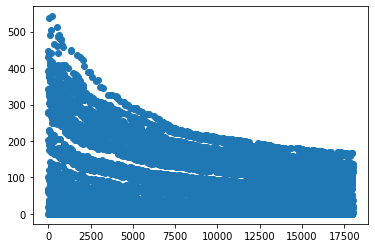

In [20]:
plt.scatter(np.arange(0, len(errors[2000:]), 1), errors[2000:])